In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Library for getting mutual info
from sklearn.feature_selection import mutual_info_regression

# for doing randomized or grid search of best estimation in model parameter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#for scalling the data
from sklearn.preprocessing import MinMaxScaler

# for calculating all scores
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score, r2_score

# all different models used here
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# to plot confusion matrix of predicted and Y_test value
from sklearn.metrics import confusion_matrix

#to ignore warning
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
data = pd.read_csv("Heart.csv", delimiter=',')
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64
Unnamed: 0    303
Age            41
Sex             2
ChestPain       4
RestBP         50
Chol          152
Fbs             2
RestECG         3
MaxHR          91
ExAng           2
Oldpeak        40
Slope           3
Ca              4
Thal            3
AHD             2
dtype: int64


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


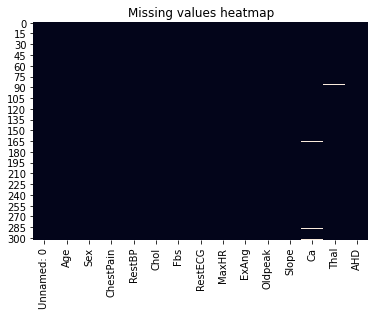

In [5]:
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap") 
print(data.nunique())

data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


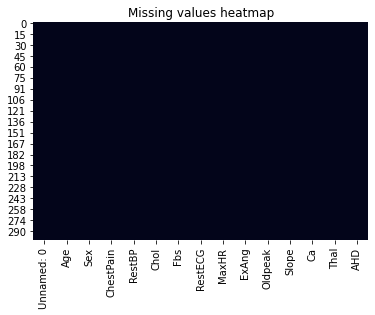

In [6]:
data_inputs = data
heart = data_inputs.dropna()
#print(heart.Ca.median())
heart.Ca[heart.Ca.isnull()] = heart.Ca.median()
heart.Thal[heart.Thal == ""] = "normal"
#print(heart.isnull().sum())
sns.heatmap(heart.isnull(), cbar = False).set_title("Missing values heatmap") 

heart

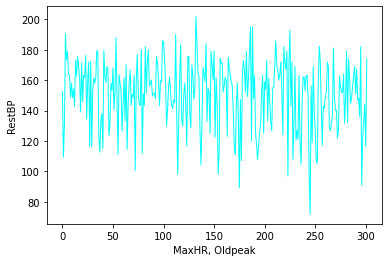

In [7]:
heartdf = heart[['RestBP','MaxHR','Oldpeak']]
heartdf.head(297)

heartdf.RestBP = heartdf.MaxHR + heartdf.Oldpeak

plt.plot(heartdf.RestBP, color='Cyan', linewidth=1.0)
plt.xlabel("MaxHR, Oldpeak")
plt.ylabel("RestBP")
plt.show()

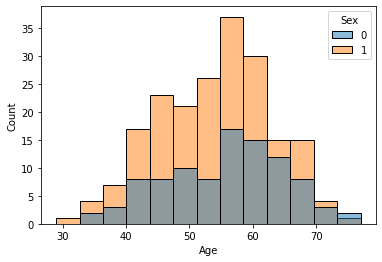

In [8]:
sns_plotAge = sns.histplot(heart, x='Age', hue="Sex")

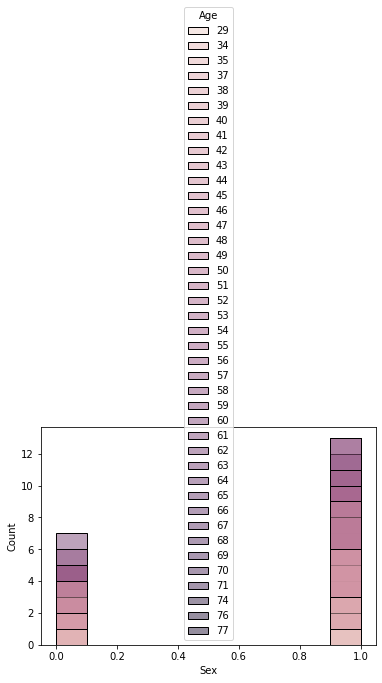

In [9]:
sns_plotSex = sns.histplot(heart, x='Sex', hue="Age")

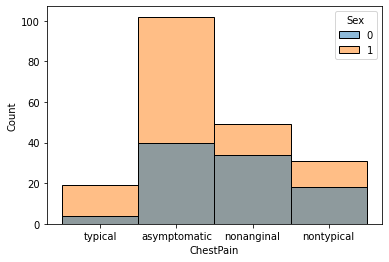

In [10]:
sns_plotChestPain = sns.histplot(heart, x='ChestPain', hue="Sex")

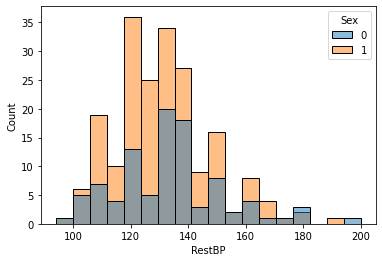

In [11]:
sns_plotRestBP = sns.histplot(heart, x='RestBP', hue="Sex")

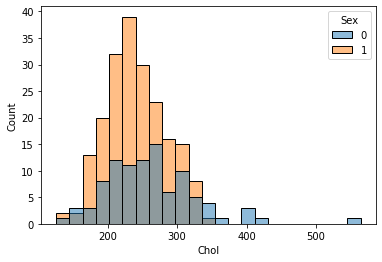

In [12]:
sns_plotChol = sns.histplot(heart, x='Chol', hue="Sex")

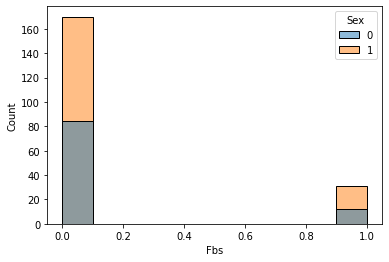

In [13]:
sns_plotFbs = sns.histplot(heart, x='Fbs', hue="Sex")

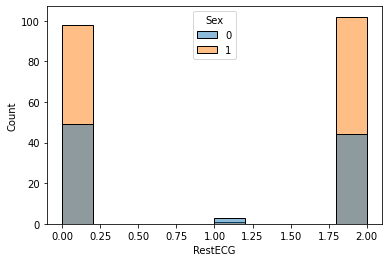

In [14]:
sns_plotRestECG = sns.histplot(heart, x='RestECG', hue="Sex")

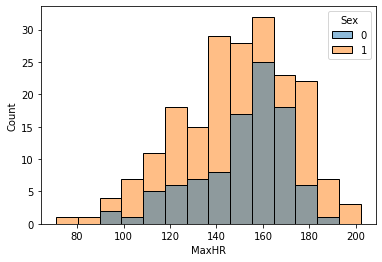

In [15]:
sns_plotMaxHR = sns.histplot(heart, x='MaxHR', hue="Sex")

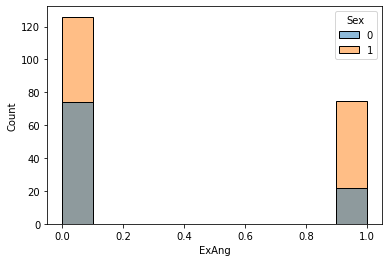

In [16]:
sns_plotExAng = sns.histplot(heart, x='ExAng', hue="Sex")

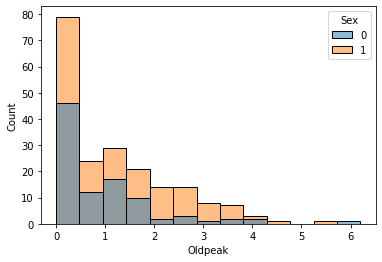

In [17]:
sns_plotRestOldpeak = sns.histplot(heart, x='Oldpeak', hue="Sex")

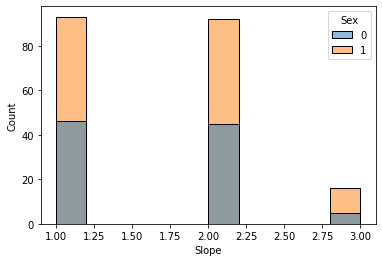

In [18]:
sns_plotSlope = sns.histplot(heart, x='Slope', hue="Sex")

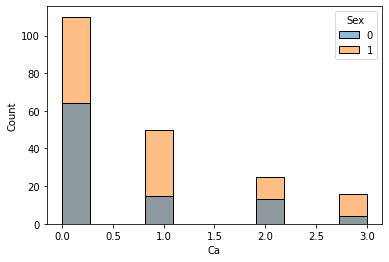

In [19]:
sns_plotCa = sns.histplot(heart, x='Ca', hue="Sex")

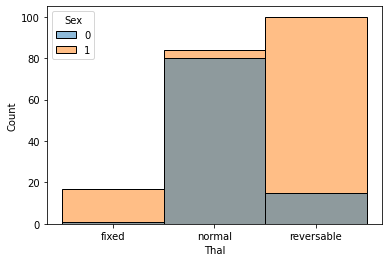

In [20]:
sns_plotThal = sns.histplot(heart, x='Thal', hue="Sex")

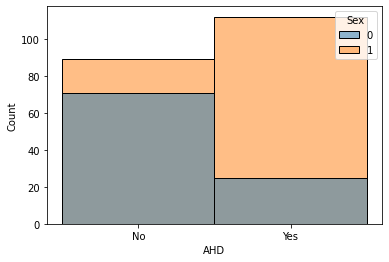

In [21]:
sns_plotAHD = sns.histplot(heart, x='AHD', hue="Sex")

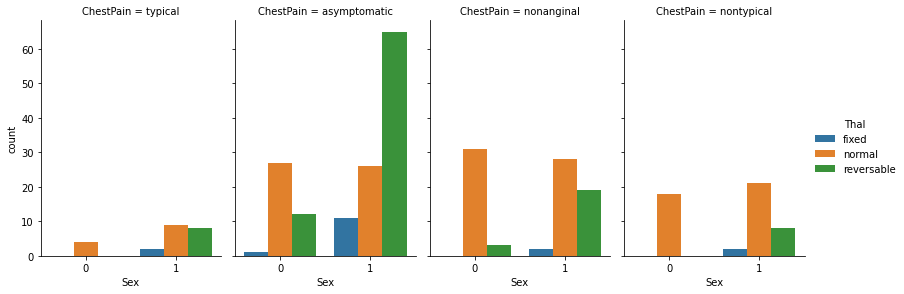

In [22]:
sns.catplot(x="Sex", hue="Thal", col="ChestPain", data=heart, kind="count", height=4, aspect=.7)

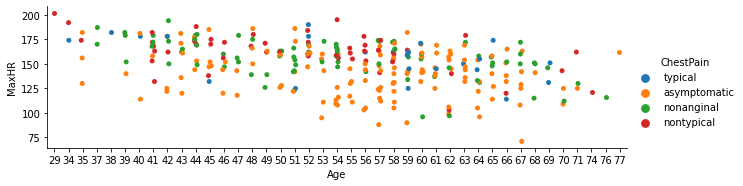

In [23]:
sns.catplot(x="Age", y="MaxHR", hue="ChestPain", data=heart, height=2.5, aspect=3.5)

<AxesSubplot:xlabel='Sex', ylabel='MaxHR'>

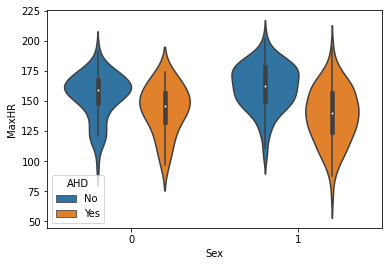

In [24]:
sns.violinplot(x="Sex", y="MaxHR", hue="AHD", data=heart)

<AxesSubplot:xlabel='Sex', ylabel='MaxHR'>

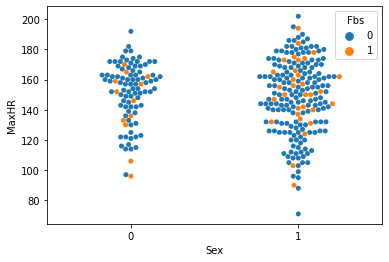

In [25]:
sns.swarmplot(x="Sex", y="MaxHR", hue="Fbs", data=heart)

<AxesSubplot:xlabel='ChestPain', ylabel='Age'>

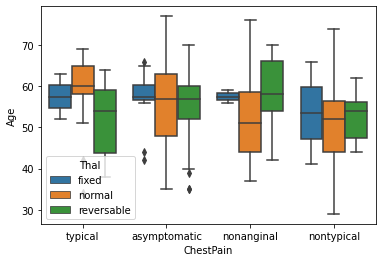

In [26]:
sns.boxplot(x="ChestPain", y="Age", hue="Thal", data=heart)

In [27]:
import statistics
print("Variance of MaxHR set is % s"%(statistics.variance(data=heart["MaxHR"])))
print("Variance of Sex set is % s"%(statistics.variance(data=heart["Sex"])))
print("Variance of Age set is % s"%(statistics.variance(data=heart["Age"])))
#print("Variance of ChestPain set is % s"%(statistics.variance(data=heart["ChestPain"])))
print("Variance of RestBP set is % s"%(statistics.variance(data=heart["RestBP"])))
print("Variance of Chol set is % s"%(statistics.variance(data=heart["Chol"])))
print("Variance of Fbs set is % s"%(statistics.variance(data=heart["Fbs"])))
print("Variance of RestECG set is % s"%(statistics.variance(data=heart["RestECG"])))
print("Variance of ExAng set is % s"%(statistics.variance(data=heart["ExAng"])))
print("Variance of Oldpeak set is % s"%(statistics.variance(data=heart["Oldpeak"])))
print("Variance of Slope set is % s"%(statistics.variance(data=heart["Slope"])))
#print("Variance of Thal set is % s"%(statistics.variance(data=heart["Thal"])))
print("Variance of Ca set is % s"%(statistics.variance(data=heart["Ca"])))
#print("Variance of AHD set is % s"%(statistics.variance(data=heart["AHD"])))

Variance of MaxHR set is 526.3152698152699
Variance of Sex set is 0.2194922194922195
Variance of Age set is 81.8977158977159
Variance of RestBP set is 315.51729001729
Variance of Chol set is 2703.7485894985894
Variance of Fbs set is 0.12423787423787425
Variance of RestECG set is 0.98985348985349
Variance of ExAng set is 0.2206752206752207
Variance of Oldpeak set is 1.3598423423423425
Variance of Slope set is 0.38215488215488214
Variance of Ca set is 0.8816543816543816


<AxesSubplot:>

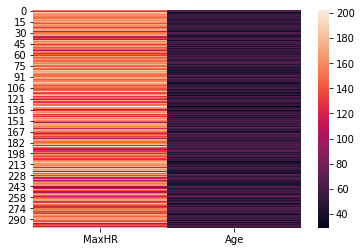

In [28]:
sns.heatmap(data=heart[['MaxHR', 'Age']])

<AxesSubplot:>

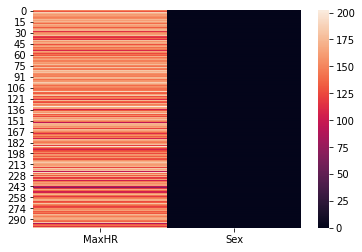

In [29]:
sns.heatmap(data=heart[['MaxHR', 'Sex']])

<AxesSubplot:>

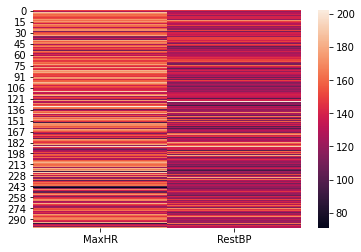

In [30]:
sns.heatmap(data=heart[['MaxHR', 'RestBP']])

<AxesSubplot:>

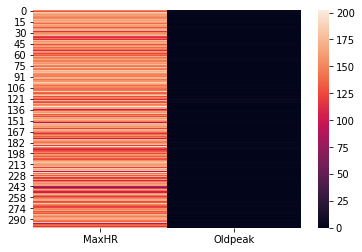

In [31]:
sns.heatmap(data=heart[['MaxHR', 'Oldpeak']])

In [32]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 45.2+ KB


In [33]:
np.mean(heart)

Unnamed: 0    150.673401
Age            54.542088
Sex             0.676768
RestBP        131.693603
Chol          247.350168
Fbs             0.144781
RestECG         0.996633
MaxHR         149.599327
ExAng           0.326599
Oldpeak         1.055556
Slope           1.602694
Ca              0.676768
dtype: float64

In [34]:
np.var(heart)

Unnamed: 0    7599.681212
Age             81.621966
Sex              0.218753
RestBP         314.454942
Chol          2694.645059
Fbs              0.123820
RestECG          0.986521
MaxHR          524.543165
ExAng            0.219932
Oldpeak          1.355264
Slope            0.380868
Ca               0.878686
dtype: float64

In [35]:
heart.shape

(297, 15)

In [36]:
heart.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.673401,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,87.323283,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.000000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,150.000000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,226.000000,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,302.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [37]:
#to check only those column which have null in them
heart[[i for i in heart.columns if heart[i].isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

In [38]:
# Removing the NaN
heart.Thal.value_counts()

normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64

In [39]:
# As the maximum number of cases have 'Normal' as the Thal, replacing the missing value to 'Normal'
heart.Thal = heart.Thal.fillna('normal')
heart.Thal.value_counts()

normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64

In [40]:
heart.Ca.value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [41]:
# As the maximum number of cases have 0.0 as the Ca, replacing the missing value to 0.0
heart.Ca = heart.Ca.fillna(0.0)
heart.Ca.value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [42]:
print(heart.ChestPain.unique())
print(heart.Thal.unique())
print(heart.AHD.unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable']
['No' 'Yes']


In [43]:
#nominal encoding technique
heart_encoding = pd.get_dummies(heart[['ChestPain', 'Thal', 'AHD']])
heart_final = pd.concat([heart, heart_encoding],1)
heart_final = heart_final.drop(['ChestPain', 'Thal', 'AHD'], axis = 1)
heart_final.head(2)

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,...,0.0,0,0,0,1,1,0,0,1,0
1,2,67,1,160,286,0,2,108,1,1.5,...,3.0,1,0,0,0,0,1,0,0,1


In [44]:
# checking no. of males(1) and female (0)
heart_final.Sex.value_counts()

1    201
0     96
Name: Sex, dtype: int64

In [45]:
pd.crosstab(heart_final.AHD_Yes,heart_final.Sex)

Sex,0,1
AHD_Yes,,
0,71,89
1,25,112


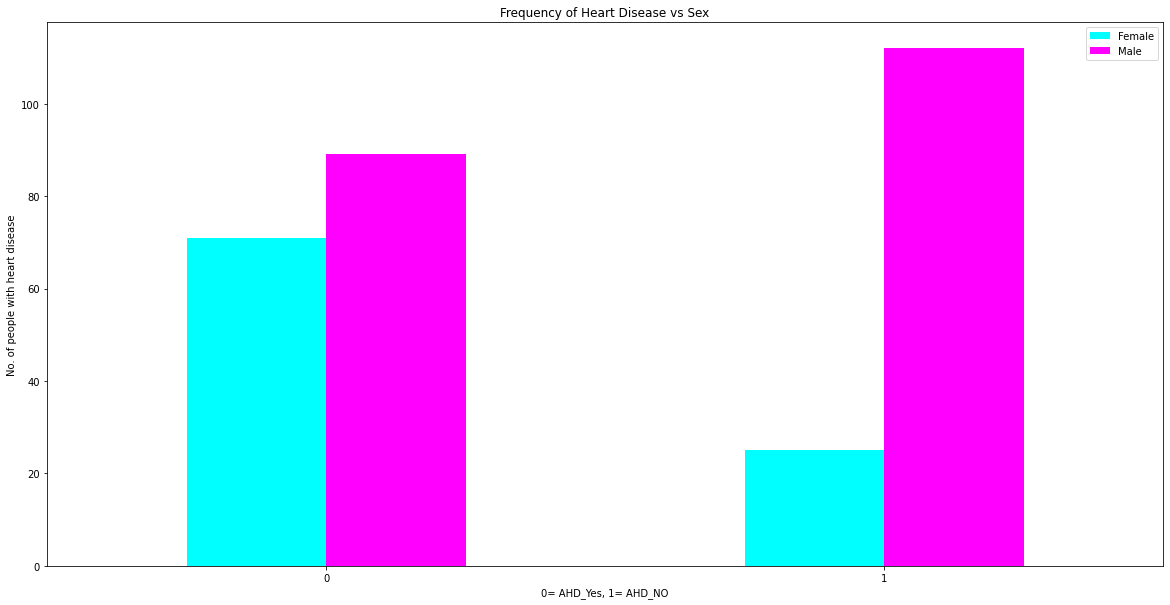

In [46]:
pd.crosstab(heart_final.AHD_Yes,heart_final.Sex).plot(kind='bar',figsize=(20,10),color=["cyan","magenta"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= AHD_Yes, 1= AHD_NO")
plt.ylabel("No. of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

Text(0.5, 1.0, 'males vs females with heart disease')

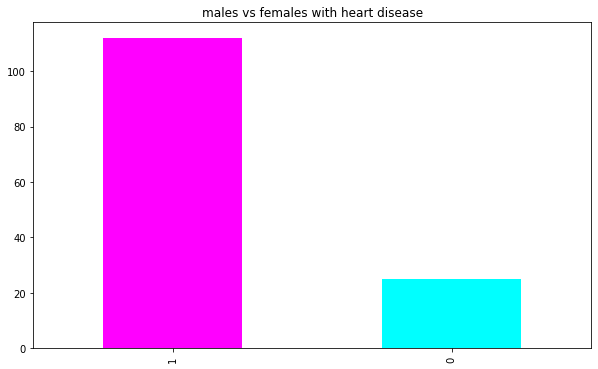

In [47]:
heart_final.Sex[heart_final.AHD_Yes==1].value_counts().plot(kind='bar',figsize=(10,6),color=['magenta','cyan'])
plt.title("males vs females with heart disease")

In [48]:
# Finding co-relation between all column
heart_final.corr()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
Unnamed: 0,1.000000,0.009262,-0.088141,-0.022257,-0.083968,-0.051693,-0.136736,-0.117355,-0.002662,-0.114656,...,0.048687,0.045880,-0.097165,0.063892,-0.011341,0.067156,0.029481,-0.062991,-0.051891,0.051891
Age,0.009262,1.000000,-0.092399,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,...,0.362210,0.137297,-0.043181,-0.163227,0.042571,0.059732,-0.130333,0.103792,-0.227075,0.227075
Sex,-0.088141,-0.092399,1.000000,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,...,0.091925,0.085014,-0.115054,-0.041925,0.092497,0.145368,-0.390730,0.327671,-0.278467,0.278467
RestBP,-0.022257,0.290476,-0.066340,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,...,0.097954,0.029082,-0.054825,-0.080820,0.149921,0.075211,-0.143474,0.109624,-0.153490,0.153490
Chol,-0.083968,0.202644,-0.198089,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,...,0.115945,0.064831,-0.023570,-0.017678,-0.057040,-0.099575,0.001379,0.047368,-0.080285,0.080285
Fbs,-0.051693,0.132062,0.038850,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,...,0.152086,-0.087329,0.106259,-0.053990,0.059785,0.096002,-0.072045,0.026522,-0.003167,0.003167
RestECG,-0.136736,0.149917,0.033897,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,...,0.129021,0.118613,-0.088542,-0.098958,0.064395,0.043483,-0.023504,0.002695,-0.166343,0.166343
MaxHR,-0.117355,-0.394563,-0.060496,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,...,-0.268727,-0.377920,0.160943,0.256120,0.080420,-0.160679,0.286684,-0.213956,0.423817,-0.423817
ExAng,-0.002662,0.096489,0.143581,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,...,0.148232,0.454514,-0.257718,-0.232185,-0.094329,0.063827,-0.325755,0.301283,-0.421355,0.421355
Oldpeak,-0.114656,0.197123,0.106567,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,...,0.294452,0.271036,-0.117376,-0.283033,0.083559,0.101819,-0.347874,0.305253,-0.424052,0.424052


<AxesSubplot:>

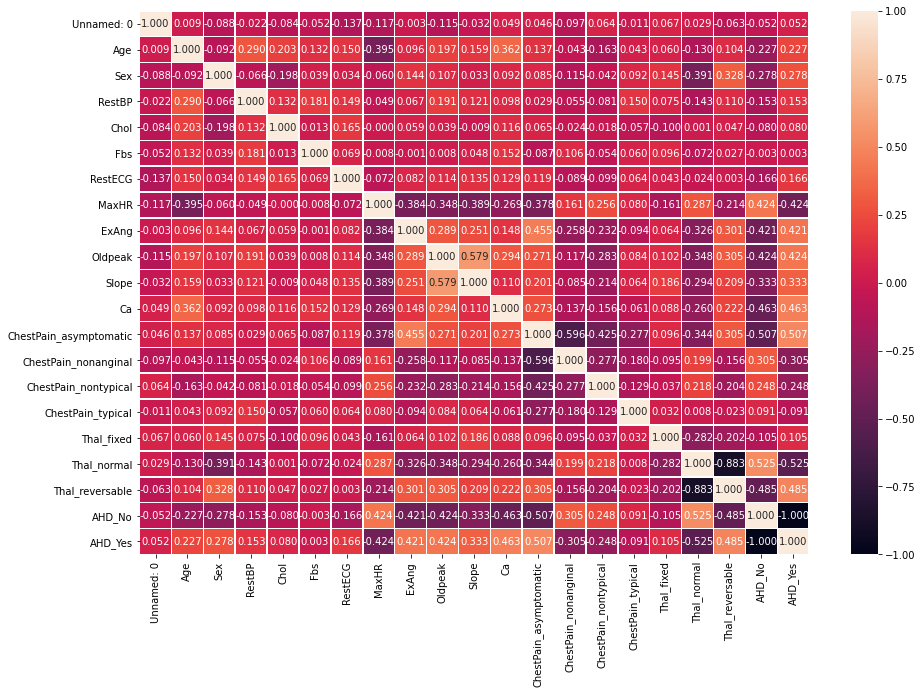

In [49]:
cor_mat=heart_final.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

In [50]:
# Conclusion:- from above co-relation and heatmap we can say that AHD_NO and AHD_yes are giving the same information, so removing one of them (AHD_No)
# droping AHD_No as its giving the same value as AHD_Yes, also droping 'Unnamed: 0' as its doesnot have any benift
heart_final = heart_final.drop(['AHD_No', 'Unnamed: 0'], axis = 1)
heart_final.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0,1


In [51]:
# getting all final column name
heart_final.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable', 'AHD_Yes'],
      dtype='object')

In [52]:
heart_scaled = heart_final

In [53]:
# Scaling all values except the target variable = AHD_Yes
MMscal=MinMaxScaler()
features=['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable']
heart_scaled[features] = MMscal.fit_transform(heart_final[features])
heart_scaled.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,0.708333,1.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.791667,1.0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.791667,1.0,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.166667,1.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.250000,0.0,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [54]:
# Creating Features and Target variable
X = heart_scaled.drop('AHD_Yes', axis=1)
Y = heart_scaled.AHD_Yes

In [55]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2 ,random_state=1)

In [56]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info

ChestPain_asymptomatic    0.131219
Thal_normal               0.116124
Oldpeak                   0.113542
Ca                        0.109777
Thal_reversable           0.107905
MaxHR                     0.099548
ExAng                     0.094708
ChestPain_nonanginal      0.063350
Chol                      0.059389
Slope                     0.036463
Sex                       0.031813
ChestPain_typical         0.028162
RestBP                    0.017277
Age                       0.002385
RestECG                   0.000000
Fbs                       0.000000
ChestPain_nontypical      0.000000
Thal_fixed                0.000000
dtype: float64

In [57]:
#Considering the columns for training the model which are more than 0% of information shared with dependent variable/feature
Req_Columns = list(mutual_info[mutual_info>0].index)
Req_Columns

['ChestPain_asymptomatic',
 'Thal_normal',
 'Oldpeak',
 'Ca',
 'Thal_reversable',
 'MaxHR',
 'ExAng',
 'ChestPain_nonanginal',
 'Chol',
 'Slope',
 'Sex',
 'ChestPain_typical',
 'RestBP',
 'Age']

In [58]:
X_train_final = X_train[Req_Columns]
X_train_final.head(1)

,ChestPain_asymptomatic,Thal_normal,Oldpeak,Ca,Thal_reversable,MaxHR,ExAng,ChestPain_nonanginal,Chol,Slope,Sex,ChestPain_typical,RestBP,Age
160,0.0,0.0,0.0,0.0,1.0,0.648855,0.0,0.0,0.1621,0.0,1.0,0.0,0.066038,0.354167


In [59]:
X_test_final = X_test[Req_Columns]
X_test_final.head(1)

,ChestPain_asymptomatic,Thal_normal,Oldpeak,Ca,Thal_reversable,MaxHR,ExAng,ChestPain_nonanginal,Chol,Slope,Sex,ChestPain_typical,RestBP,Age
139,0.0,1.0,0.387097,0.0,0.0,0.725191,0.0,1.0,0.271689,0.5,1.0,0.0,0.292453,0.458333


In [60]:
#X_test_final = X_test
#X_train_final = X_train

In [61]:
def evaluation(Y_test,Y_pred):
    acc=accuracy_score(Y_test,Y_pred)
    rcl=recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test,Y_pred)
    auc_score=roc_auc_score(Y_test,Y_pred)
    prec_score=precision_score(Y_test,Y_pred)
    
    metric_dict={'accuracy': round(acc*100,2),
               'recall': round(rcl*100,2),
               'F1 score': round(f1*100,2),
               'auc score': round(auc_score*100,2),
               'precision': round(prec_score*100,2)
                }
    
    return print(metric_dict)

In [62]:
np.random.seed(42)
LR_model=LogisticRegression()
LR_model.fit(X_train_final,y_train)
LR_model_y_pred=LR_model.predict(X_test_final)
LR_model_r2_score=round(r2_score(y_test,LR_model_y_pred)*100,2)
print(len(heart[heart["MaxHR"] >= 160]) / len(heart) * 99, "% possibility of MaxHR >= 160")
print("R2 Score for predicted value: ",LR_model_r2_score)
print("Accuracy on Training set: ",round(LR_model.score(X_train_final,y_train)*100,2))
LR_model_score = round(LR_model.score(X_test_final,y_test)*100,2)
print("Accuracy on Testing set: ",LR_model_score)
evaluation(y_test,LR_model_y_pred)


39.0 % possibility of MaxHR >= 160
R2 Score for predicted value:  46.67
Accuracy on Training set:  86.92
Accuracy on Testing set:  86.67
{'accuracy': 86.67, 'recall': 86.67, 'F1 score': 86.67, 'auc score': 86.67, 'precision': 86.67}


In [63]:
np.random.seed(42)
RFC_model=RandomForestClassifier()
RFC_model.fit(X_train_final,y_train)
RFC_model_y_pred=RFC_model.predict(X_test_final)
RFC_model_r2_score=round(r2_score(y_test,RFC_model_y_pred)*100,2)
print(len(heart[heart["MaxHR"] >= 160]) / len(heart) * 100, "% possibility of MaxHR >= 160")
print("R2 Score for predicted value: ",RFC_model_r2_score)
print("Accuracy on Training set: ",round(RFC_model.score(X_train_final,y_train)*100,2))
RFC_model_score = round(RFC_model.score(X_test_final,y_test)*100,2)
print("Accuracy on Testing set: ",RFC_model_score)
evaluation(y_test,RFC_model_y_pred)

39.39393939393939 % possibility of MaxHR >= 160
R2 Score for predicted value:  46.67
Accuracy on Training set:  100.0
Accuracy on Testing set:  86.67
{'accuracy': 86.67, 'recall': 86.67, 'F1 score': 86.67, 'auc score': 86.67, 'precision': 86.67}


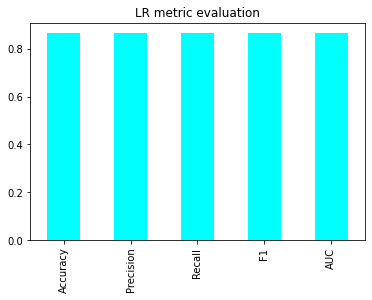

In [64]:
LR_final_metrics={'Accuracy': LR_model.score(X_test_final,y_test),
                   'Precision': precision_score(y_test,LR_model_y_pred),
                   'Recall': recall_score(y_test,LR_model_y_pred),
                   'F1': f1_score(y_test,LR_model_y_pred),
                   'AUC': roc_auc_score(y_test,LR_model_y_pred)}

LR_metrics=pd.DataFrame(LR_final_metrics,index=[0])
LR_metrics.T.plot.bar(title='LR metric evaluation',legend=False,color="Cyan");

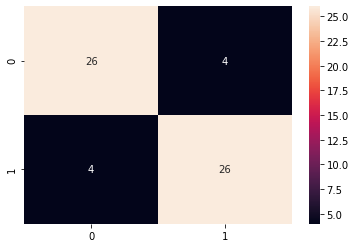

In [65]:
fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(y_test,LR_model_y_pred),annot=True,cbar=True)

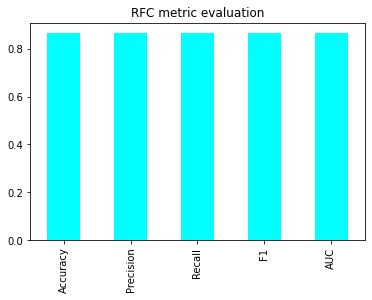

In [66]:
RFC_final_metrics={'Accuracy': RFC_model.score(X_test_final,y_test),
                   'Precision': precision_score(y_test,RFC_model_y_pred),
                   'Recall': recall_score(y_test,RFC_model_y_pred),
                   'F1': f1_score(y_test,RFC_model_y_pred),
                   'AUC': roc_auc_score(y_test,RFC_model_y_pred)}

RFC_metrics=pd.DataFrame(RFC_final_metrics,index=[0])
RFC_metrics.T.plot.bar(title='RFC metric evaluation',legend=False,color="Cyan");

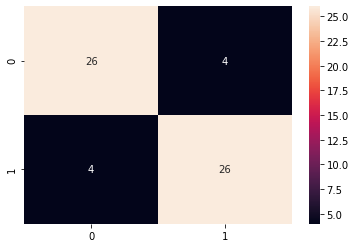

In [67]:
fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(y_test,RFC_model_y_pred),annot=True,cbar=True)

In [123]:
from sklearn.linear_model import LinearRegression

y = heart['RestBP'].values.reshape(-1,1)
x1 = heart['MaxHR'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x1, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 137.38 + -0.038022X


In [124]:
y = heart['RestBP'].values.reshape(-1,1)
x2 = heart['Oldpeak'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x2, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 128.62 + 2.9131X


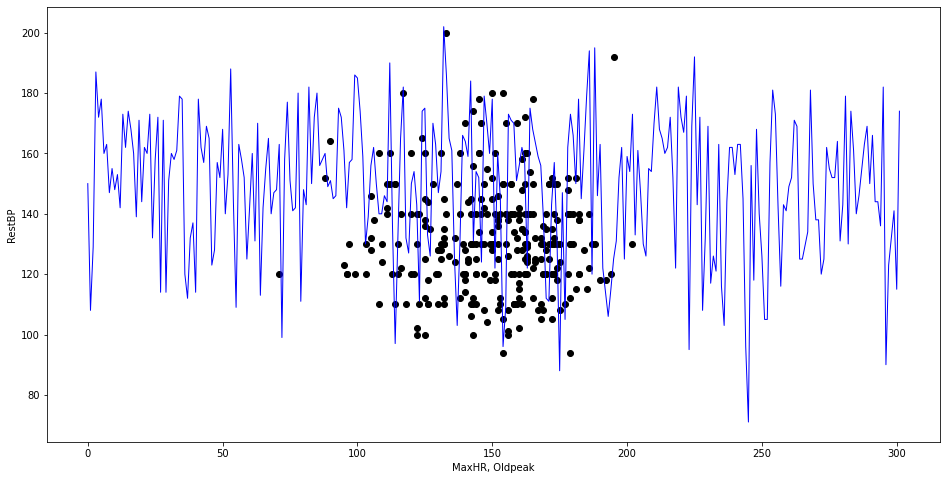

In [125]:
predictions = reg.predict(x1)
plt.figure(figsize=(16, 8))
plt.scatter(heart['MaxHR'], heart['RestBP'], c='black')
plt.plot(heart['MaxHR'], c='blue', linewidth=1)
plt.xlabel("MaxHR, Oldpeak")
plt.ylabel("RestBP")
plt.show()

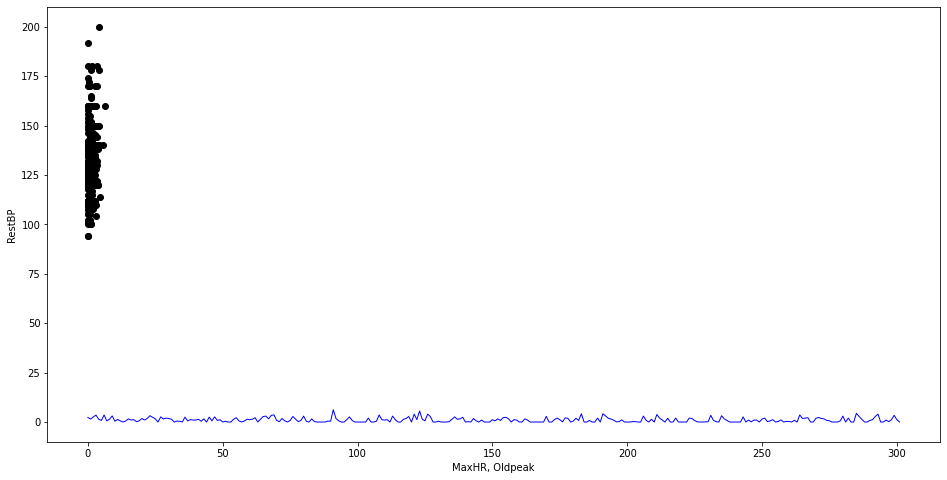

In [126]:
predictions = reg.predict(x2)
plt.figure(figsize=(16, 8))
plt.scatter(heart['Oldpeak'], heart['RestBP'], c='black')
plt.plot(heart['Oldpeak'], c='blue', linewidth=1)
plt.xlabel("MaxHR, Oldpeak")
plt.ylabel("RestBP")
plt.show()

In [101]:
ht_160 = heart[heart['MaxHR'] > 160]

x1 = ht_160[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]
y1 = ht_160['MaxHR'].values.reshape(-1,1)

regL = LinearRegression()
regL.fit(x1,y1)
r_sq =regL.score(x1,y1)

print('coefficient of determination:', r_sq)
print("The linear model is: Y = {:.5} + {:.5}X1 + {:.5}X2".format(regL.intercept_[0], regL.coef_[0][0], regL.coef_[0][1]))
actual = len(heart[heart["MaxHR"] >= 160]) / len(heart) * 100;
#print(actual)
print(actual, "% - actual percentage of people with MaxHR >= 160")
print("Linear regression result = {} %".format(r_sq * 100))
print('Accuracy - ', r_sq * 10000 / actual, "%")

#ht_100 = heart[heart['MaxHR'] <= 160]

print('Original data:\n', heart)
y_pred = regL.predict(heart[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']])
print('\nPredicted data:\n', y_pred)

data_example = pd.read_csv("HeartExample.csv", delimiter=',')

ht_160_example = data_example[data_example['MaxHR'] > 160]

x2 = ht_160_example[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]
y2 = ht_160_example['MaxHR'].values.reshape(-1,1)

regL_example = LinearRegression()
regL_example.fit(x2,y2)
r_sq_example =regL_example.score(x2,y2)

actual_example = len(data_example[data_example["MaxHR"] >= 160]) / len(data_example) * 100;
print(actual_example, "% - actual percentage of people with MaxHR example >= 160\n")
print("\nLinear regression example result = {} %\n".format(r_sq_example * 100))
print('\nAccuracy example - ', actual_example / r_sq_example, "%\n")

print('\nExample data:\n', data_example)
y_pred_example = regL_example.predict(data_example[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']])
print('\nPredicted example data:\n', y_pred_example)


coefficient of determination: 0.2937357378572081
The linear model is: Y = 186.99 + -0.53038X1 + 2.2493X2
39.39393939393939 % - actual percentage of people with MaxHR >= 160
Linear regression result = 29.373573785720808 %
Accuracy -  74.56368730221436 %
Original data:
      Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
297         298   57    0  asymptomatic     140   241    0        0    123   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  as

In [102]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)

x = ht_160[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]
x1 = poly_reg.fit_transform(x)
y1 = ht_160['MaxHR'].values.reshape(-1,1)

regP = LinearRegression()
regP.fit(x1,y1)

r_sq =regP.score(x1,y1)

print('coefficient of determination:', r_sq)
print("The linear model is: Y = {:.5} + {:.5}X1 + {:.5}X2".format(regP.intercept_[0], regP.coef_[0][0], regP.coef_[0][1]))
actual = len(heart[heart["MaxHR"] >= 160]) / len(heart) * 100;
#print(actual)
print(actual, "% - actual percentage of people with MaxHR >= 160")
print("Polynomial result = {} %".format(r_sq * 100))
print('Accuracy - ', actual / r_sq, "%")

#ht_100 = heart[heart['MaxHR'] <= 160]

print('Original data:\n', heart)
y_pred = regP.predict(poly_reg.fit_transform(heart[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]))
print('\nPredicted data:\n', y_pred)

data_example = pd.read_csv("HeartExample.csv", delimiter=',')

poly_reg_example = PolynomialFeatures(degree = 4)

x_new = ht_160[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]
x2 = poly_reg_example.fit_transform(x_new)
y2 = ht_160['MaxHR'].values.reshape(-1,1)

regP_example = LinearRegression()
regP_example.fit(x2,y2)
r_sq_example =regP_example.score(x2,y2)

actual_example = len(data_example[data_example["MaxHR"] >= 160]) / len(data_example) * 100;
print(actual_example, "% - actual percentage of people with MaxHR example >= 160\n")
print("\nPolynomial regression example result = {} %\n".format(r_sq_example * 100))
print('\nAccuracy example - ', actual_example / r_sq_example, "%\n")

print('\nExample data:\n', data_example)
y_pred_example = regP_example.predict(poly_reg_example.fit_transform(data_example[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]))
print('\nPredicted example data:\n', y_pred_example)

coefficient of determination: 1.0
The linear model is: Y = 296.31 + -1.7773e-11X1 + 3.8058e-08X2
39.39393939393939 % - actual percentage of people with MaxHR >= 160
Polynomial result = 100.0 %
Accuracy -  39.39393939393939 %
Original data:
      Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
297         298   57    0  asymptomatic     140   241    0        0    123   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    

In [103]:
x1 = ht_160[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]
y1 = ht_160['MaxHR'].values.reshape(-1,1)

model = LogisticRegression()
model.fit(x1,y1)
r_sq = model.score(x1,y1)

print('coefficient of determination:', r_sq)
print("The linear model is: Y = {:.5} + {:.5}X1 + {:.5}X2".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1]))
actual = len(heart[heart["MaxHR"] >= 160]) / len(heart) * 100;
#print(actual)
print(actual, "% - actual percentage of people with MaxHR >= 160")
print("Logistic regression result = {} %".format(r_sq * 100))
print('Accuracy - ', r_sq * 10000 / actual, "%")

#ht_100 = heart[heart['MaxHR'] <= 160]

print('Original data:\n', heart)
y_pred = model.predict(heart[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']])
print('\nPredicted data:\n', y_pred)

data_example = pd.read_csv("HeartExample.csv", delimiter=',')

x2 = ht_160_example[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]
y2 = ht_160_example['MaxHR'].values.reshape(-1,1)

model_example = LogisticRegression()
model_example.fit(x2,y2)
r_sq_example = model_example.score(x2,y2)

actual_example = len(data_example[data_example["MaxHR"] >= 160]) / len(data_example) * 100;
print(actual_example, "% - actual percentage of people with MaxHR example >= 160\n")
print("\nLogistic regression example result = {} %\n".format(r_sq_example * 100))
print('\nAccuracy example - ', actual_example / r_sq_example, "%\n")

print('\nExample data:\n', data_example)
y_pred_example = model_example.predict(data_example[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'ExAng', 'Oldpeak', 'Slope', 'Ca']])
print('\nPredicted example data:\n', y_pred_example)

coefficient of determination: 0.12962962962962962
The linear model is: Y = -0.0049541 + 0.137X1 + -0.0031319X2
39.39393939393939 % - actual percentage of people with MaxHR >= 160
Logistic regression result = 12.962962962962962 %
Accuracy -  32.90598290598291 %
Original data:
      Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
297         298   57    0  asymptomatic     140   241    0        0    123   
298         299   45    1       typical     110   264    0        0    132   
299         300   68 